In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import time
import math
import experiments.toy_regression as exp

In [2]:
device = torch.device("cpu")

In [3]:
batch_size = 2
noise = torch.tensor(3).to(device) # 3, 0.02
layers = [
    (1, 100),
    (100, 1)
]
learn_var = False

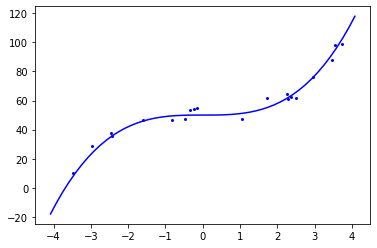

In [6]:
from training import toy
import matplotlib.pyplot as plt

torch.manual_seed(42)

trainset = toy.CubicToyDataset(min=-4, max=4, sample_count=20, noise=noise, normalize=False, offset=50)
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)

axis = plt.subplot()
trainset.plot_dataset(axis)

In [ ]:
torch.manual_seed(42)
gp = exp.gaussian_process(1000, trainset.normalized_xs, trainset.normalized_ys)

In [13]:
torch.manual_seed(42)
pp = exp.point_estimator(layers, noise, learn_var, 900, trainloader, batch_size, device)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Epoch 0: loss 101.29725646972656
Epoch 100: loss 3.0837812423706055
Epoch 200: loss 2.625816822052002
Epoch 300: loss 4.186040878295898
Epoch 400: loss 1.5049715042114258
Epoch 500: loss 1.452440619468689
Epoch 600: loss 1.9003146886825562
Epoch 700: loss 1.175550103187561
Epoch 800: loss 1.7446622848510742
Final loss 1.7141664028167725


In [14]:
torch.manual_seed(42)
swag = exp.swag(layers, noise, learn_var, 900, 5, 20, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Epoch 0: loss 101.29725646972656
Epoch 100: loss 3.0837812423706055
Epoch 200: loss 2.625816822052002
Epoch 300: loss 4.186040878295898
Epoch 400: loss 1.5049715042114258
Epoch 500: loss 1.452440619468689
Epoch 600: loss 1.9003146886825562
Epoch 700: loss 1.175550103187561
Epoch 800: loss 1.7446622848510742
Final loss 1.7141664028167725


In [15]:
torch.manual_seed(42)
ensemble = exp.ensemble(5, layers, noise, learn_var, 900, trainloader, batch_size, parallel=False)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Training model 0
  Epoch 0: loss 90.29674530029297
  Epoch 100: loss 2.4900267124176025
  Epoch 200: loss 5.233826637268066
  Epoch 300: loss 1.4438714981079102
  Epoch 400: loss 1.93867969512939

In [16]:
torch.manual_seed(42)
mc_dropout = exp.mc_dropout(0.1, layers, noise, learn_var, 900, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=111, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=111, out_features=1, bias=True)
)
Epoch 0: loss 81.3866195678711
Epoch 100: loss 6.845311164855957
Epoch 200: loss 3.5264732837677
Epoch 300: loss 3.6221375465393066
Epoch 400: loss 2.8940234184265137
Epoch 500: loss 3.2613015174865723
Epoch 600: loss 3.1285858154296875
Epoch 700: loss 2.916590690612793
Epoch 800: loss 2.5534427165985107
Final loss 2.1597931385040283


In [27]:
torch.manual_seed(42)
intel_bbb = exp.intel_bbb(layers, noise, learn_var, 1000, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
Epoch 0: loss 301.73834228515625
Epoch 100: loss 6.858273983001709
Epoch 200: loss 4.106848239898682
Epoch 300: loss 3.6648051738739014
Epoch 400: loss 3.4722094535827637
Epoch 500: loss 3.0169150829315186
Epoch 600: loss 3.014418363571167
Epoch 700: loss 2.714266777038574
Epoch 800: loss 2.941624879837036
Epoch 900: loss 2.6556124687194824
Final loss 3.4892077445983887


In [28]:
torch.manual_seed(42)
bbb = exp.bbb(layers, noise, learn_var, 1000, trainloader, batch_size, device)

Generated model: Sequential(
  (0): BBBLinear()
  (1): ReLU()
  (2): BBBLinear()
)
Epoch 0: loss 2655.80029296875
Epoch 100: loss 40.494834899902344
Epoch 200: loss 26.3367862701416
Epoch 300: loss 17.531953811645508
Epoch 400: loss 15.780367851257324
Epoch 500: loss 18.48093605041504
Epoch 600: loss 14.769844055175781
Epoch 700: loss 10.348662376403809
Epoch 800: loss 12.007335662841797
Epoch 900: loss 8.419755935668945
Final loss 13.703927993774414


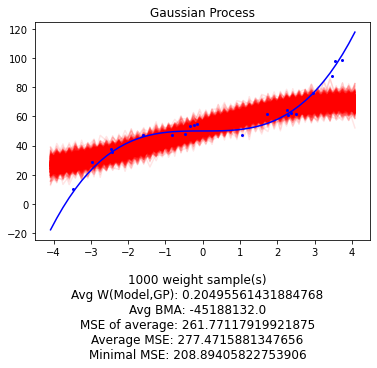

In [12]:
trainset.plot("Gaussian Process", gp, gp, alpha=0.1, samples=1000)

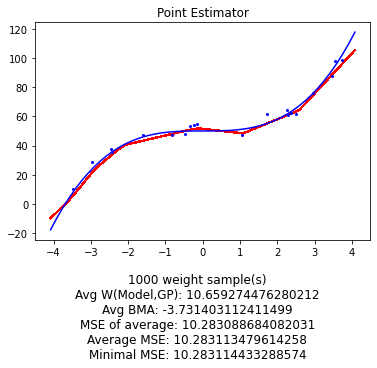

In [19]:
trainset.plot("Point Estimator", pp, gp, alpha=0.1, samples=1000)

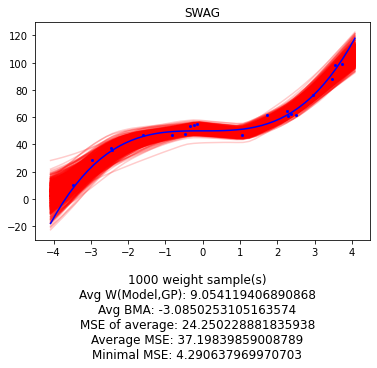

In [20]:
trainset.plot("SWAG", swag, gp, alpha=0.2, samples=1000)

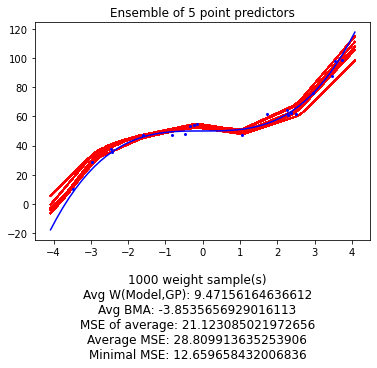

In [21]:
trainset.plot("Ensemble of 5 point predictors", ensemble, gp, alpha=0.1, samples=1000)

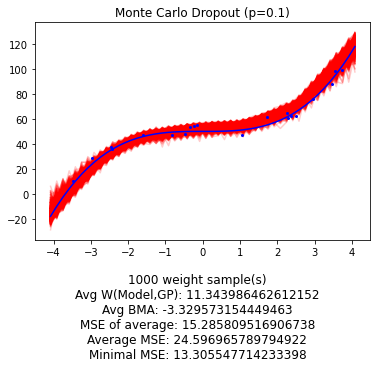

In [22]:
trainset.plot("Monte Carlo Dropout (p=0.1)", mc_dropout, gp, alpha=0.2, samples=1000)

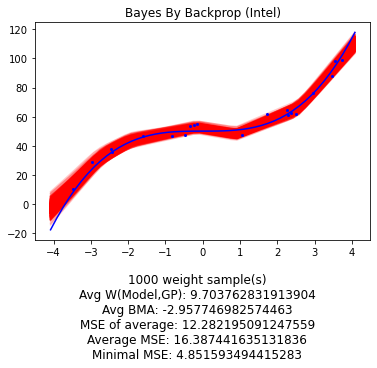

In [26]:
trainset.plot("Bayes By Backprop (Intel)", intel_bbb, gp, alpha=0.2, samples=1000)

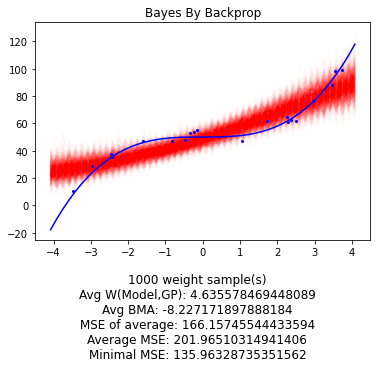

In [29]:
trainset.plot("Bayes By Backprop", bbb, gp, alpha=0.01, samples=1000)